In [8]:
import xarray as xr 
import matplotlib.pyplot as plt

import numpy as np                 #for general calculations.

from matplotlib.animation import FuncAnimation  #creating animations and videos.
from IPython.display import Video, HTML         #embedding videos in the notebook

#this command allows interactive plots in noteboks
%matplotlib inline   

In [9]:
fname="20180113{hh}0000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc";

data = xr.open_dataset(fname.format(hh="12"))  #xarray can open different format data, netcdf is one of them


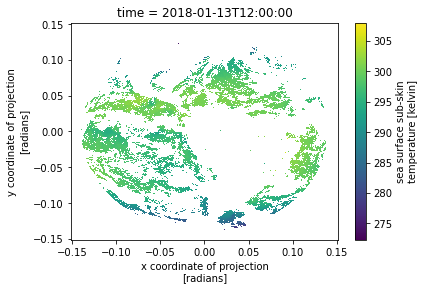

In [10]:
data.sea_surface_temperature.plot()

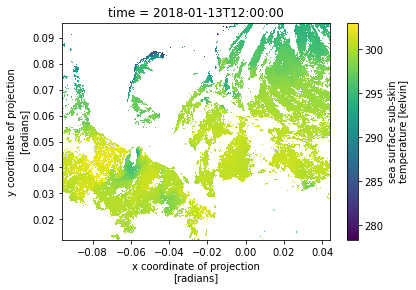

In [11]:
data.sea_surface_temperature[0,1000:2500:1,1000:3500:1].plot()

In [112]:
data

<xarray.Dataset>
Dimensions:                       (time: 1, nj: 5424, ni: 5424)
Coordinates:
  * time                          (time) datetime64[ns] 2018-01-13T23:00:00
  * nj                            (nj) float32 0.1518 0.1518 ... -0.1518 -0.1518
  * ni                            (ni) float32 -0.1518 -0.1518 ... 0.1518 0.1518
Data variables: (12/15)
    sst_dtime                     (time, nj, ni) timedelta64[ns] ...
    satellite_zenith_angle        (time, nj, ni) float32 ...
    sea_surface_temperature       (time, nj, ni) float32 ...
    brightness_temperature_08um6  (time, nj, ni) float32 ...
    brightness_temperature_10um4  (time, nj, ni) float32 ...
    brightness_temperature_11um2  (time, nj, ni) float32 ...
    ...                            ...
    dt_analysis                   (time, nj, ni) float32 ...
    wind_speed                    (time, nj, ni) float32 ...
    sea_ice_fraction              (time, nj, ni) float32 ...
    l2p_flags                     (time, nj, ni) int16 ...
    quality_level                 (time, nj, ni) float32 ...
    geostationary                 int32 ...
Attributes: (12/70)
    CFAC:                       20425339
    COFF:                       2712.4998
    Coefficient_for_Sd:         1737135756.914831
    Dist_Virt_Sat:              42164.16
    Earth_Radius_Equator:       6378.137
    Earth_Radius_Polar:         6356.752314140001
    ...                         ...
    sst_luts:                   LUT_ABI_G16_L2C_DEPTH_DAYNIGHT_V01.06_2019042...
    CollationInput:             ACSPO_V2.70_G16_ABI_2018-01-13_1500-1515_2019...
    CollationMissingGranules:   0
    CollationAbnormalGranules:  0
    id:                         ABI_G16-STAR-L2P-v2.7
    CollationVersion:           1.17.0

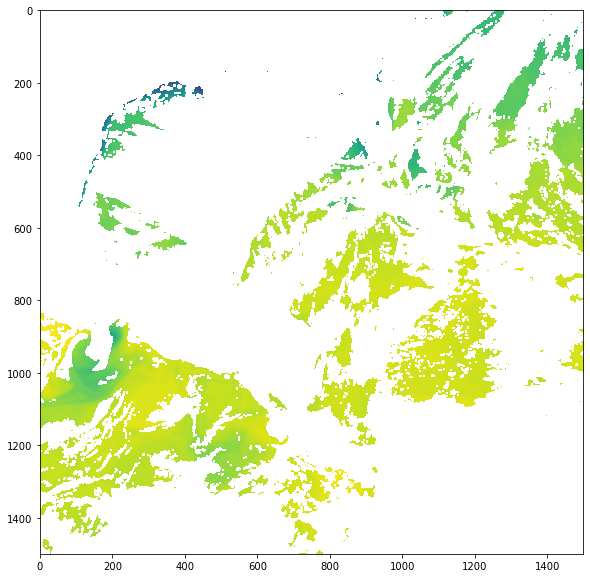

In [33]:
T=data.sea_surface_temperature[0,1000:2500:1,1500:3000:1]
fig = plt.figure(figsize=(10,10))
#plt.pcolor(T.ni,T.nj,T)
plt.imshow(T)
plt.savefig('figs/1.jpg')


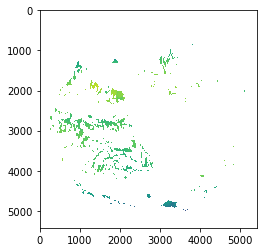

In [118]:
plt.imshow(data.sea_surface_temperature[0])

In [115]:
data.quality_level[0]

<xarray.DataArray 'quality_level' (nj: 5424, ni: 5424)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2018-01-13T23:00:00
  * nj       (nj) float32 0.1518 0.1518 0.1517 ... -0.1517 -0.1518 -0.1518
  * ni       (ni) float32 -0.1518 -0.1518 -0.1517 ... 0.1517 0.1518 0.1518
Attributes:
    comment:        SST quality levels: 5 corresponds to "clear-sky" pixels a...
    flag_meanings:  no_data bad_data not_used not_used not_used best_quality
    flag_values:    [0 1 2 3 4 5]
    long_name:      quality level of SST pixel
    valid_max:      5
    valid_min:      0
    grid_mapping:   geostationary

In [49]:
for i in range(24):
    fname="20180113{hh}0000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc";
    hour=str(i).zfill(2)
    
    data = xr.open_dataset(fname.format(hh=hour))  #xarray can open different format data, netcdf is one of them
    T=data.sea_surface_temperature[0,1000:2500:1,1500:3000:1]    
    qual=data.quality_level[0,1000:2500:1,1500:3000:1]
    T[qual~=5]=np.nan
    
    plt.figure(figsize=(10,10))
    plt.imshow(T); plt.colorbar(); plt.clim([275, 305])
    plt.savefig('figs/' + hour + '.jpg')
    plt.close()
    display(i)

0

1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

18

19

20

21

22

23

In [129]:
SST=np.zeros((24,T.shape[0],T.shape[1]));
for i in range(24):
    fname="20180113{hh}0000-STAR-L2P_GHRSST-SSTsubskin-ABI_G16-ACSPO_V2.70-v02.0-fv01.0.nc";
    hour=str(i).zfill(2)
    
    data = xr.open_dataset(fname.format(hh=hour))  #xarray can open different format data, netcdf is one of them
    T=data.sea_surface_temperature[0,1000:2500:1,1500:3000:1].values   
    qual=data.quality_level[0,1000:2500:1,1500:3000:1]
    T[qual!=5]=np.nan
    SST[i,:,:]=T
    display(i)

0

1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

18

19

20

21

22

23

In [164]:
SST_comp=np.nanmean(SST,axis=0);
SST_tiled=SST.reshape((24,15,100,15,100))

/tmp/ipykernel_118/767108316.py:1: RuntimeWarning: Mean of empty slice
  SST_comp=np.nanmean(SST,axis=0);


In [165]:
np.sum(np.isnan(np.nanmean(SST_tiled, axis=(0,2,4))))

/tmp/ipykernel_118/118476175.py:1: RuntimeWarning: Mean of empty slice
  np.sum(np.isnan(np.nanmean(SST_tiled, axis=(0,2,4))))


18

/tmp/ipykernel_118/1628169986.py:1: RuntimeWarning: Mean of empty slice
  plt.imshow(np.isnan(np.nanmean(SST_tiled, axis=(0,2,4))))


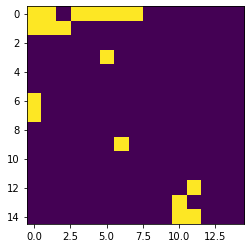

In [137]:
plt.imshow(np.isnan(np.nanmean(SST_tiled, axis=(0,2,4))))

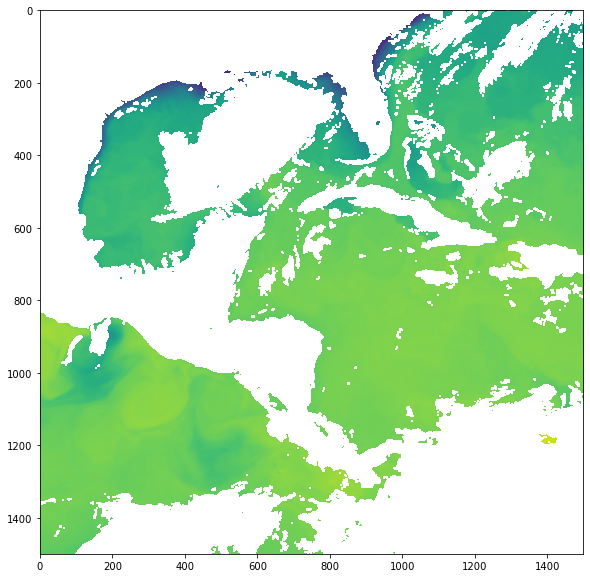

In [166]:
plt.figure(figsize=(10,10))
plt.imshow(SST_comp)

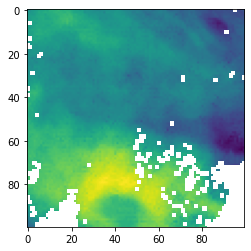

In [174]:
plt.imshow(SST_tiled[1,10,:,10,:])

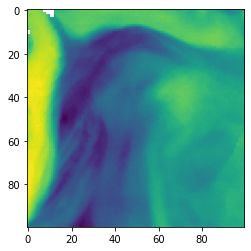

In [172]:
plt.imshow(SST_tiled[2,10,:,4,:])

/tmp/ipykernel_118/2899357841.py:1: RuntimeWarning: Mean of empty slice
  plt.imshow(np.nanmean(sst[:,:,4,:,2],axis=0))


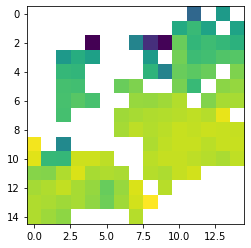

In [143]:
plt.imshow(np.nanmean(sst[:,:,4,:,2],axis=0))